# Project 3 :: Julian Nowaczek

Setup environment:

In [1]:
import imageio
import numpy as np
import math
from matplotlib.colors import LogNorm
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import scipy.misc as misc
import scipy.ndimage as ndi

In [2]:
plt.style.use(['seaborn-poster', {'axes.grid': False, 'image.cmap' : 'Greys_r'}])

original = misc.ascent()

## Question 1


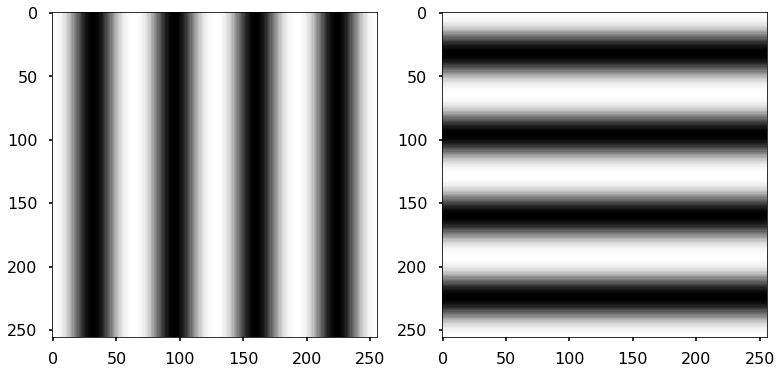

In [3]:
N = 256
T = 4
C1, C2 = .5, .5
image1, image2 = np.zeros((N,N)), np.zeros((N,N))
for m in range(N):
    for n in range(N):
        image1[m,n] = C1 + C2 * math.cos(2 * math.pi * (n / (N / T)))
        image2[m,n] = C1 + C2 * math.cos(2 * math.pi * (m / (N / T)))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.show()

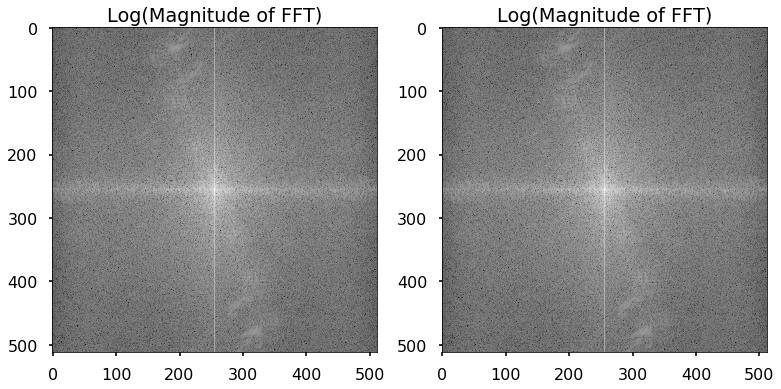

In [18]:
A1 = image1 - .5
B1 = np.abs(np.fft.fftshift(np.fft.fft2(image1)))
plt.subplot(1, 2, 1)
plt.title('Log(Magnitude of FFT)')
plt.imshow(np.log(B1))
A2 = image2 - .5
B2 = np.abs(np.fft.fftshift(np.fft.fft2(image1)))
plt.subplot(1, 2, 2)
plt.title('Log(Magnitude of FFT)')
plt.imshow(np.log(B2))
plt.show()

The parameter N deterimines the resolution of the resulting square image, for example when N is 128 the resulting image will be 128x128. T affects the frequency of the oscillation by determining the number of periods displayed in the resulting image.

## Question 2

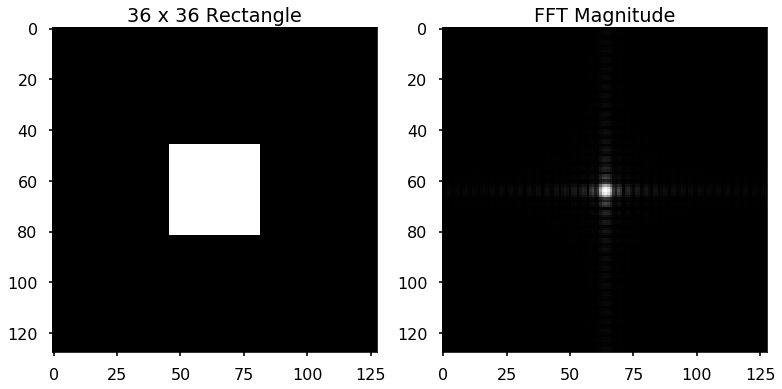

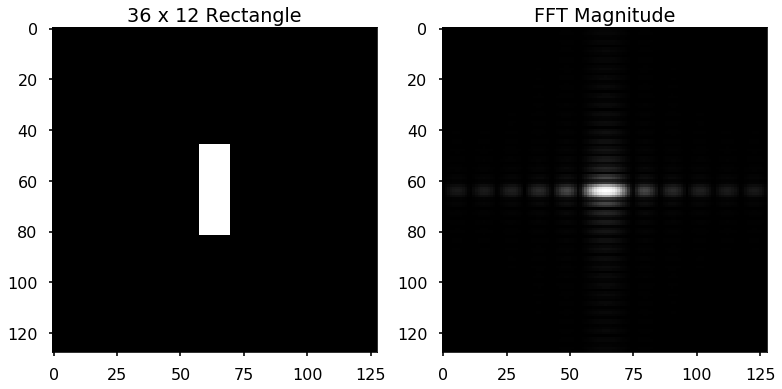

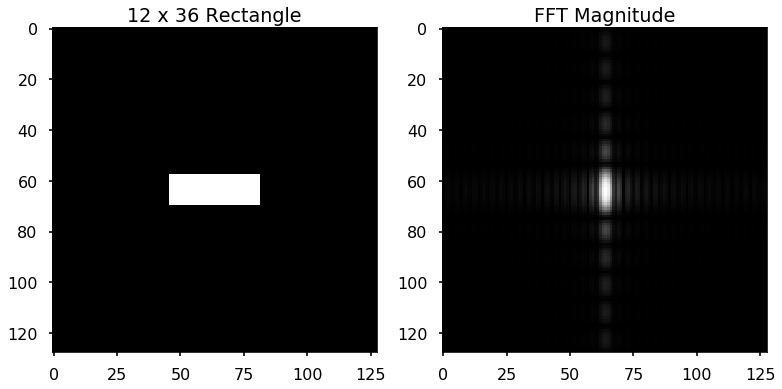

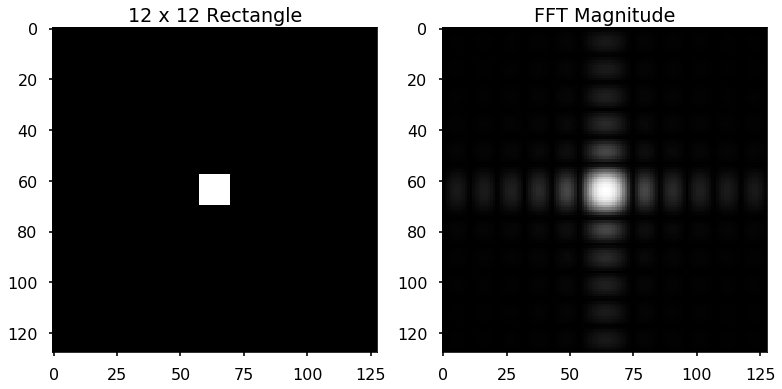

In [5]:
M, P = {36, 12}, {36, 12}
for x in M:
    for y in P:
        image = np.full((128, 128), 0, dtype='uint8')
        image[(64 - x // 2):(64 + x // 2), (64 - y // 2):(64 + y // 2)] = 255
        plt.tight_layout()
        plt.subplot(1, 2, 1)
        plt.title(str(x) + " x " + str(y) + " Rectangle")
        plt.imshow(image)
        plt.subplot(1, 2, 2)
        plt.title("FFT Magnitude")
        transform = np.abs(np.fft.fftshift(np.fft.fft2(image)))
        plt.imshow(transform)
        plt.show()

## Question 3

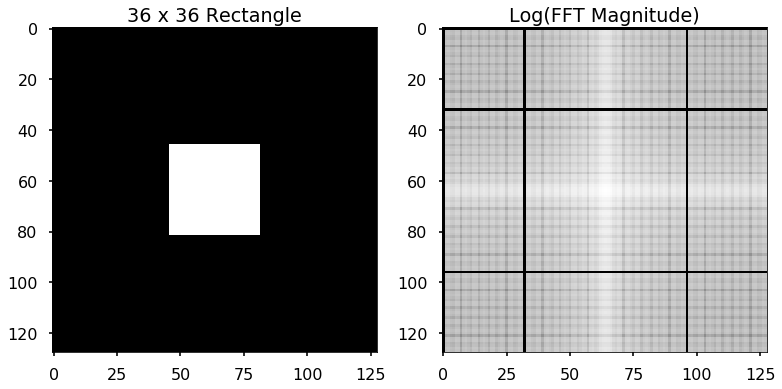

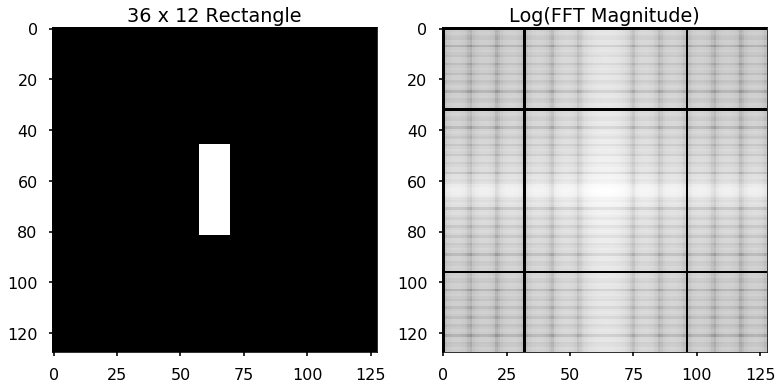

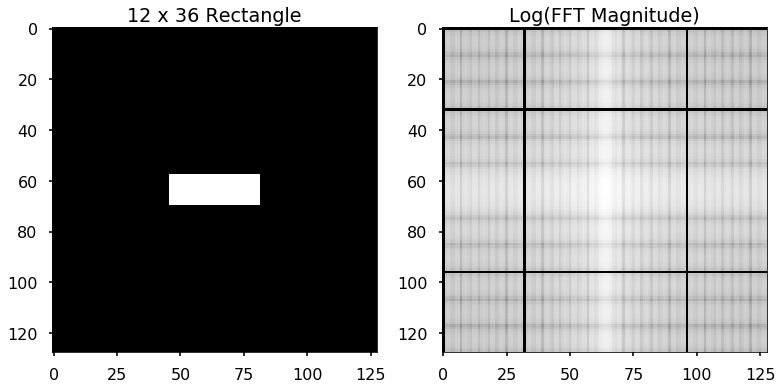

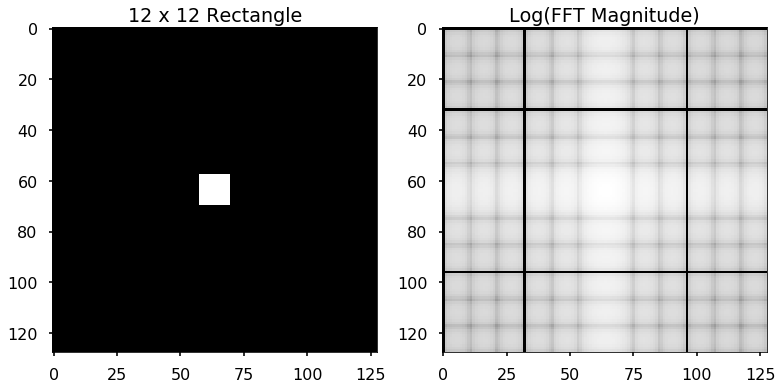

In [6]:
for x in M:
    for y in P:
        image = np.full((128, 128), 0, dtype='uint8')
        image[(64 - x // 2):(64 + x // 2), (64 - y // 2):(64 + y // 2)] = 255
        plt.tight_layout()
        plt.subplot(1, 2, 1)
        plt.title(str(x) + " x " + str(y) + " Rectangle")
        plt.imshow(image)
        plt.subplot(1, 2, 2)
        plt.title("Log(FFT Magnitude)")
        transform = np.abs(np.fft.fftshift(np.fft.fft2(image)))
        plt.imshow(np.log(transform + .0001))
        plt.show()

## Question 4

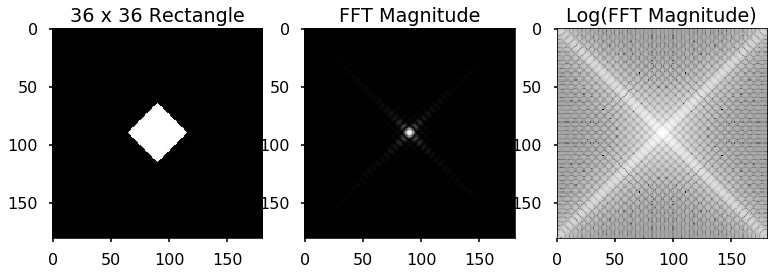

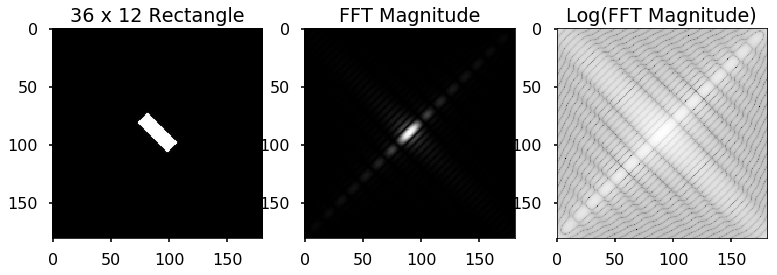

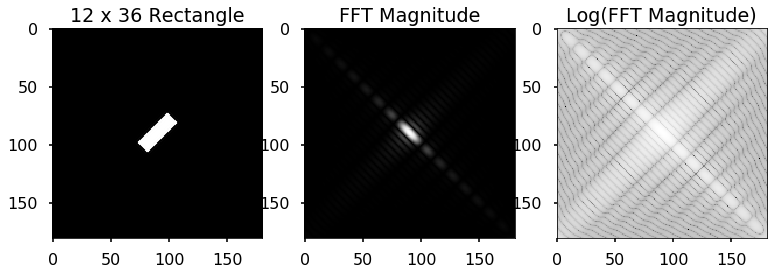

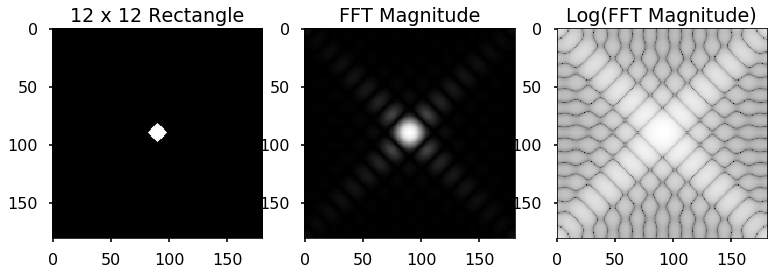

In [7]:
for x in M:
    for y in P:
        image = np.full((128, 128), 0, dtype='uint8')
        image[(64 - x // 2):(64 + x // 2), (64 - y // 2):(64 + y // 2)] = 255
        image = ndi.rotate(image, 45)
        plt.tight_layout()
        plt.subplot(1, 3, 1)
        plt.title(str(x) + " x " + str(y) + " Rectangle")
        plt.imshow(image)
        plt.subplot(1, 3, 2)
        plt.title("FFT Magnitude")
        transform = np.abs(np.fft.fftshift(np.fft.fft2(image)))
        plt.imshow(transform)
        plt.subplot(1, 3, 3)
        plt.title("Log(FFT Magnitude)")
        plt.imshow(np.log(transform + .0001))
        plt.show()

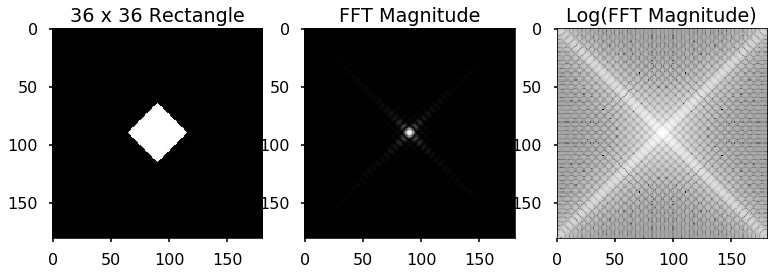

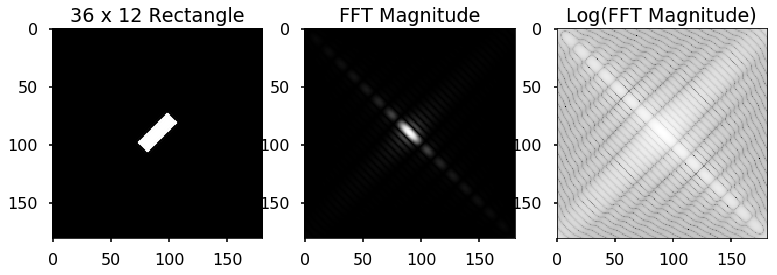

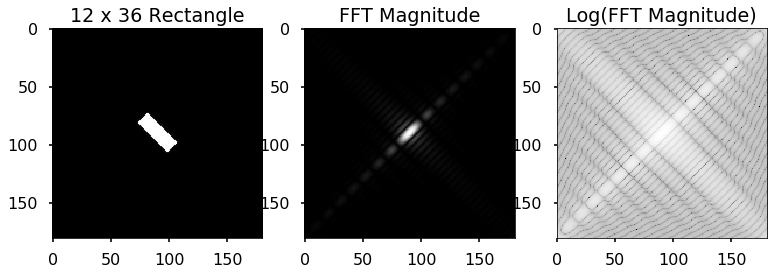

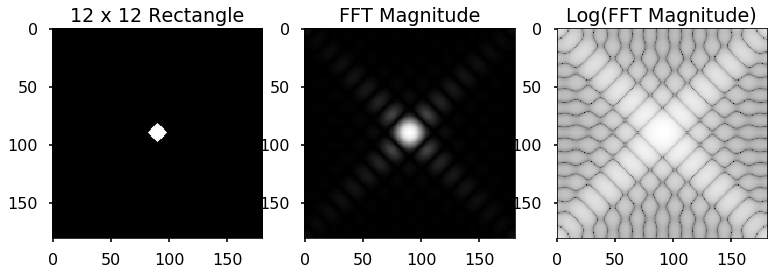

In [8]:
for x in M:
    for y in P:
        image = np.full((128, 128), 0, dtype='uint8')
        image[(64 - x // 2):(64 + x // 2), (64 - y // 2):(64 + y // 2)] = 255
        image = ndi.rotate(image, 135)
        plt.tight_layout()
        plt.subplot(1, 3, 1)
        plt.title(str(x) + " x " + str(y) + " Rectangle")
        plt.imshow(image)
        plt.subplot(1, 3, 2)
        plt.title("FFT Magnitude")
        transform = np.abs(np.fft.fftshift(np.fft.fft2(image)))
        plt.imshow(transform)
        plt.subplot(1, 3, 3)
        plt.title("Log(FFT Magnitude)")
        plt.imshow(np.log(transform + .0001))
        plt.show()

## Question 5

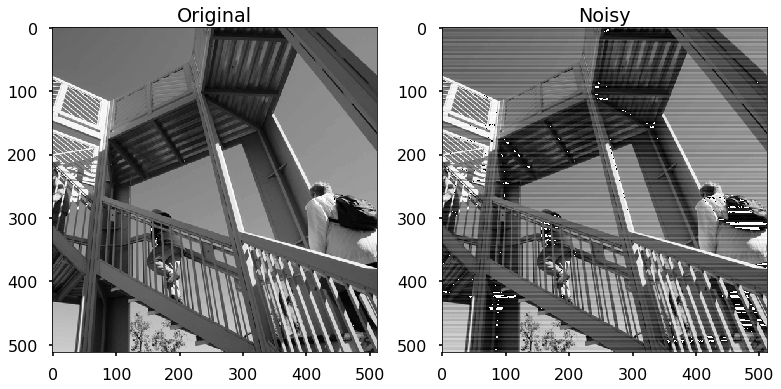

In [9]:
noisy = np.copy(original)
magnitude, x_freq, y_freq = 15, 3, 0
for index, value in np.ndenumerate(original):
    x, y = index
    noisy[index] = value + (magnitude * math.cos(x_freq * x + y_freq * y))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original)
plt.subplot(1, 2, 2)
plt.title("Noisy")
plt.imshow(noisy.astype('uint8'))
plt.show()

## Question 6

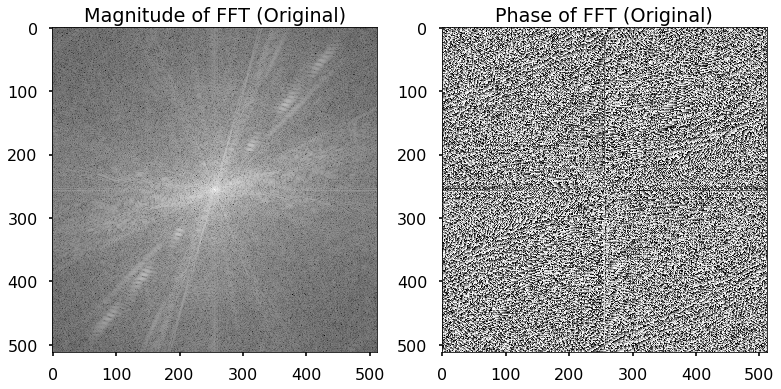

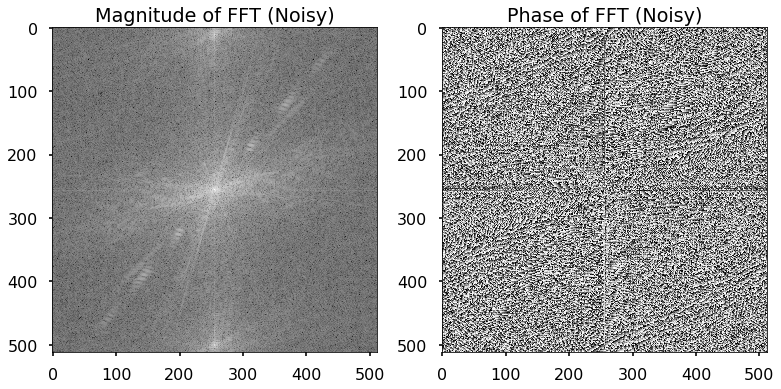

In [10]:
fourierO = np.fft.fft2(np.copy(original))
fourierN = np.fft.fft2(noisy.astype('uint8'))
magnitudeO = np.fft.fftshift(np.abs(fourierO))
phaseO = np.fft.fftshift(np.angle(fourierO))
magnitudeN = np.fft.fftshift(np.abs(fourierN))
phaseN = np.fft.fftshift(np.angle(fourierN))
plt.tight_layout()
plt.subplot(1, 2, 1)
plt.title('Magnitude of FFT (Original)')
plt.imshow(np.log(magnitudeO))
plt.subplot(1, 2, 2)
plt.title('Phase of FFT (Original)')
plt.imshow(phaseN)
plt.show()
plt.subplot(1, 2, 1)
plt.title('Magnitude of FFT (Noisy)')
plt.imshow(np.log(magnitudeN))
plt.subplot(1, 2, 2)
plt.title('Phase of FFT (Noisy)')
plt.imshow(phaseN)
plt.show()

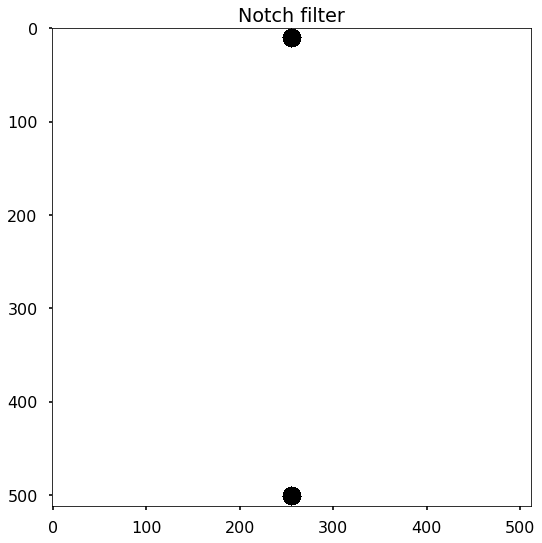

In [11]:
width = 10
center, neg_center = (245, 0), (-245, 0)
filter = np.ones((512, 512))
for index, value in np.ndenumerate(np.ones((512, 512))):
    x, y = index[0], index[1]
    distance = math.sqrt((x - 256 - center[0]) ** 2 + (y - 256 - center[1]) ** 2)
    neg_distance = math.sqrt((x - 256 - neg_center[0]) ** 2 + (y - 256 - neg_center[1]) ** 2)
    if (distance <= width):
        filter[index] = 0
    elif (neg_distance <= width):
        filter[index] = 0
plt.title('Notch filter')
plt.imshow(filter)
plt.show()

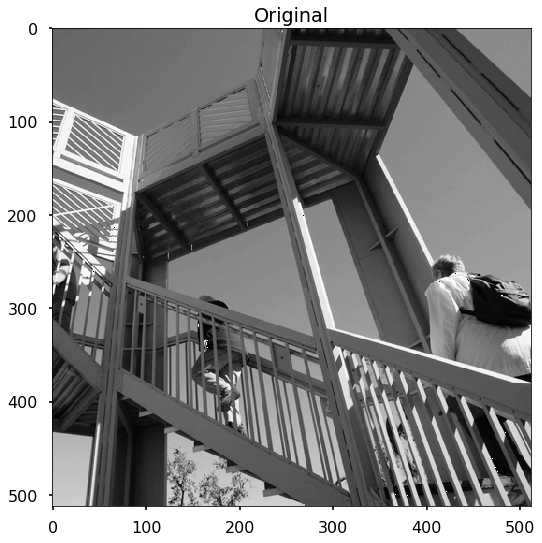

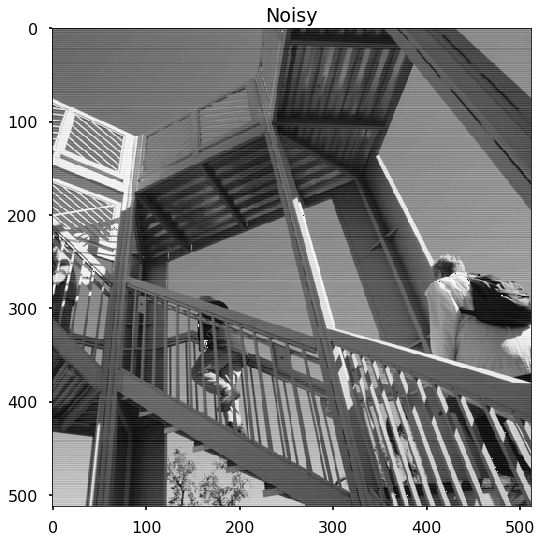

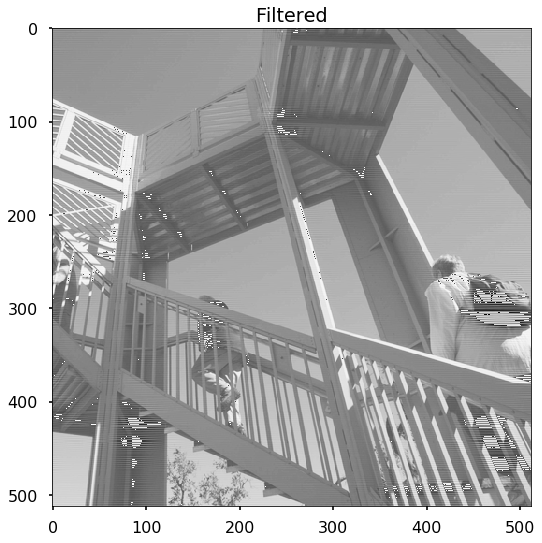

In [12]:
filtered_transform = np.multiply(np.fft.fftshift(fourierN), filter)
result = np.fft.ifft2(np.fft.ifftshift(filtered_transform))
plt.title('Original')
plt.imshow(original)
plt.show()
plt.title('Noisy')
plt.imshow(noisy)
plt.show()
plt.title('Filtered')
plt.imshow(np.real(result))
plt.show()

## Question 7

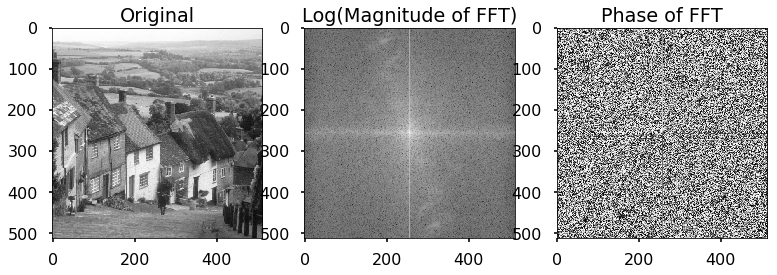

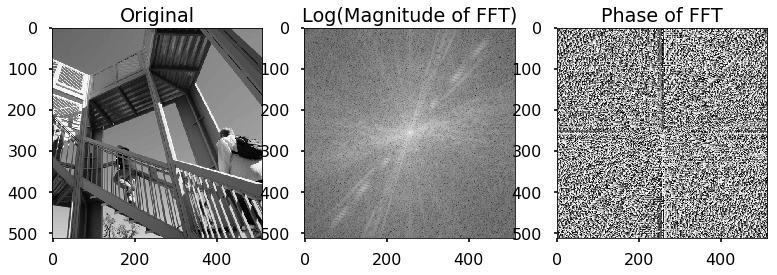

In [13]:
image1 = imageio.imread('https://homepages.cae.wisc.edu/~ece533/images/goldhill.png')
image1_magnitude = np.fft.fftshift(np.abs(np.fft.fft2(image1)))
image1_phase = np.fft.fftshift(np.angle(np.fft.fft2(image1)))

image2 = misc.ascent()
image2_magnitude = np.fft.fftshift(np.abs(np.fft.fft2(image2)))
image2_phase = np.fft.fftshift(np.angle(np.fft.fft2(image2)))

plt.tight_layout()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image1)
plt.subplot(1, 3, 2)
plt.title('Log(Magnitude of FFT)')
plt.imshow(np.log(image1_magnitude))
plt.subplot(1, 3, 3)
plt.title('Phase of FFT')
plt.imshow(image1_phase)
plt.show()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image2)
plt.subplot(1, 3, 2)
plt.title('Log(Magnitude of FFT)')
plt.imshow(np.log(image2_magnitude))
plt.subplot(1, 3, 3)
plt.title('Phase of FFT')
plt.imshow(image2_phase)
plt.show()

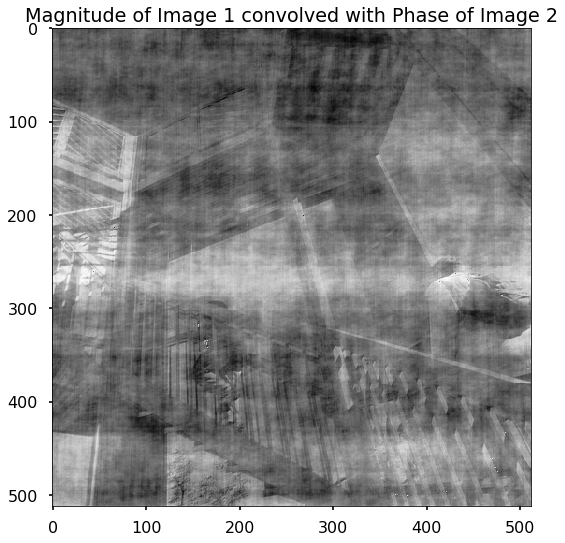

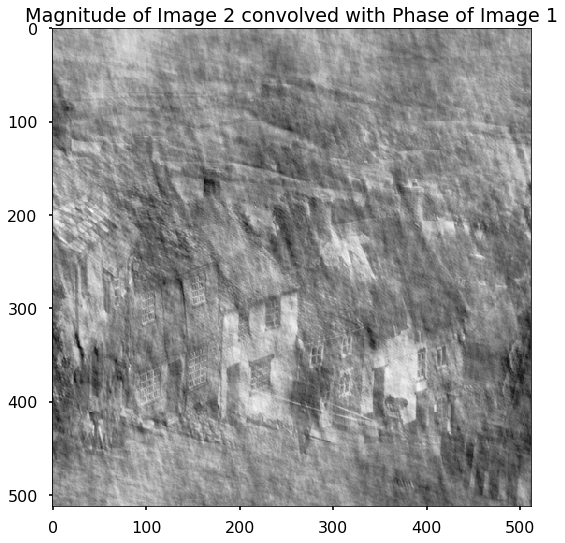

In [14]:
chimera1 = np.multiply(image1_magnitude, np.exp(image2_phase * 1j))
chimera2 = np.multiply(image2_magnitude, np.exp(image1_phase * 1j))

plt.title('Magnitude of Image 1 convolved with Phase of Image 2')
plt.imshow(np.fft.ifft2(np.fft.ifftshift(chimera1)).real)
plt.show()
plt.title('Magnitude of Image 2 convolved with Phase of Image 1')
plt.imshow(np.fft.ifft2(np.fft.ifftshift(chimera2)).real)
plt.show()